In [1]:
import pandas as pd
import numpy as np


In [12]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data",names = ["Class","LW","LD","RW","RD"],header = None)

In [13]:
data.head()

,Class,LW,LD,RW,RD
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [11]:
data[0].unique()

array(['B', 'R', 'L'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [17]:
le=LabelEncoder()
data['Class'] = le.fit_transform(data["Class"])

In [18]:
data.head()

,Class,LW,LD,RW,RD
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [20]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [21]:
x.head()

,LW,LD,RW,RD
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [22]:
y.head()

0    0
1    2
2    2
3    2
4    2
Name: Class, dtype: int32

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.33)

In [26]:
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from statistics import mean

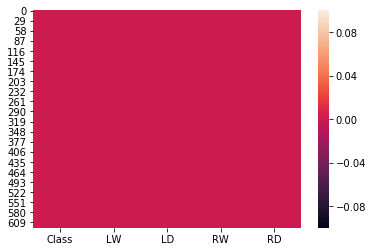

In [27]:
sns.heatmap(data.isnull())

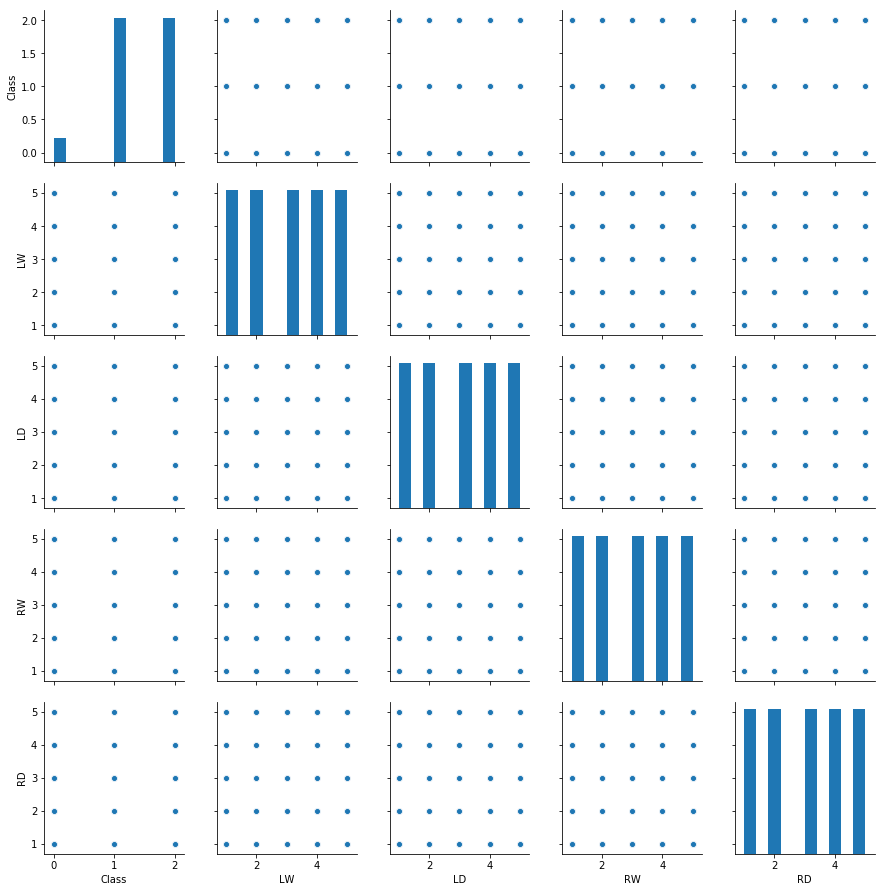

In [29]:
sns.pairplot(data)

In [45]:
model = [LogisticRegression(),RandomForestClassifier(),XGBClassifier(),SVC(),ExtraTreesClassifier()]

In [46]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n",m,"\n")
    print("\nAccuracy Score\n",score(y_test,pred)*100,"%")



 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 


Accuracy Score
 85.99033816425121 %

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 


Accuracy Score
 76.81159420289855 %

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_est

In [47]:
import pickle 

In [49]:
smod=pickle.dumps(model[3])

In [50]:
lmod=pickle.loads(smod)

In [53]:
lmod.predict(x_test)

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1])